<a href="https://colab.research.google.com/github/venuvardhan22/OIBSIP/blob/main/Level%202%20-%20Project%201/HousePricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
data.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
indices = [5, 6, 7, 8, 9, 11, 12]

for i in indices:
    data.iloc[:, i] = label.fit_transform(data.iloc[:, i])

data.head()


<ipython-input-16-a2fb0b6da229>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, i] = label.fit_transform(data.iloc[:, i])
<ipython-input-16-a2fb0b6da229>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, i] = label.fit_transform(data.iloc[:, i])
<ipython-input-16-a2fb0b6da229>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-un

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = data.drop(columns=['price'])
y = data['price']

rf = RandomForestRegressor()

rf.fit(X, y)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)


             Feature  Importance
0               area    0.456023
2          bathrooms    0.170495
9            parking    0.056528
11  furnishingstatus    0.055220
8    airconditioning    0.055032
3            stories    0.051427
1           bedrooms    0.039582
10          prefarea    0.039278
6           basement    0.031709
5          guestroom    0.020046
7    hotwaterheating    0.015412
4           mainroad    0.009246


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

X = np.array(data['area']).reshape(-1, 1)  # Reshape to a 2D array
y = np.array(data['price'])

lr = LinearRegression()
lr.fit(X, y)

y_pred = lr.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error (MSE):", mse)

r_squared = r2_score(y, y_pred)
print("R-squared:", r_squared)

predicted_price = lr.predict(np.array([[new_area]]))
print("Predicted price for an area of", new_area, "is", predicted_price[0])


Mean Squared Error (MSE): 2488861398180.6567
R-squared: 0.2872931546811469
Predicted price for an area of 1000 is 2849283.376669213


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming X and y are already defined
X = data.drop('price', axis=1)  # Features
y = data['price']  # Target variable

# Initialize and fit the linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Make predictions
y_pred = lr.predict(X)

# Calculate the MSE
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 1117238565479.8245
R-squared: 0.680069137617004


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data.drop('price',axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Mean Squared Error (MSE): 1771751116594.0352
R-squared: 0.6494754192267803


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = data.drop('price', axis=1)
y = data['price']

# Initialize linear regression model
lr = LinearRegression()

# Initialize Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=5, step=1)

# Fit RFE to the data
rfe.fit(X, y)

# Selected features after RFE
selected_features = X.columns[rfe.support_]

# Transform the dataset to include only selected features
X_selected = rfe.transform(X)

# Fit linear regression model using selected features
lr.fit(X_selected, y)

# Predict target variable
y_pred = lr.predict(X_selected)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Selected Features: Index(['bathrooms', 'mainroad', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')
Mean Squared Error (MSE): 1675824327564.7913
R-squared: 0.5201133053530546


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming data is your DataFrame containing features and target variable
# X should contain your features and y should contain your target variable
X = data.drop('price', axis=1)
y = data['price']

# Select the top k features based on their correlation with the target variable
k = 5  # Change this value according to your requirements
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of selected features
selected_features = X.columns[selected_feature_indices]

# Initialize linear regression model
lr = LinearRegression()

# Fit linear regression model using selected features
lr.fit(X_selected, y)

# Predict target variable
y_pred = lr.predict(X_selected)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)

# Calculate R-squared
r_squared = r2_score(y, y_pred)

print("Selected Features:", selected_features)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)


Selected Features: Index(['area', 'bathrooms', 'stories', 'airconditioning', 'parking'], dtype='object')
Mean Squared Error (MSE): 1385099697400.1775
R-squared: 0.6033648010661445


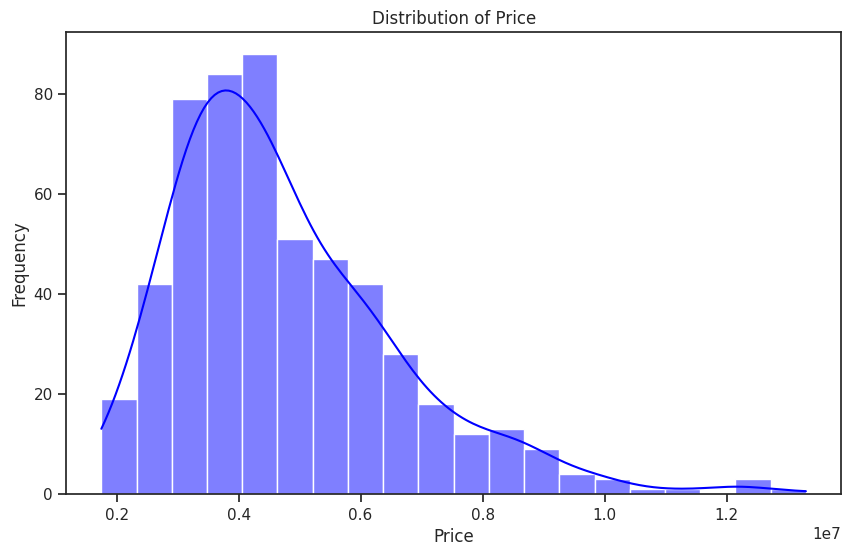

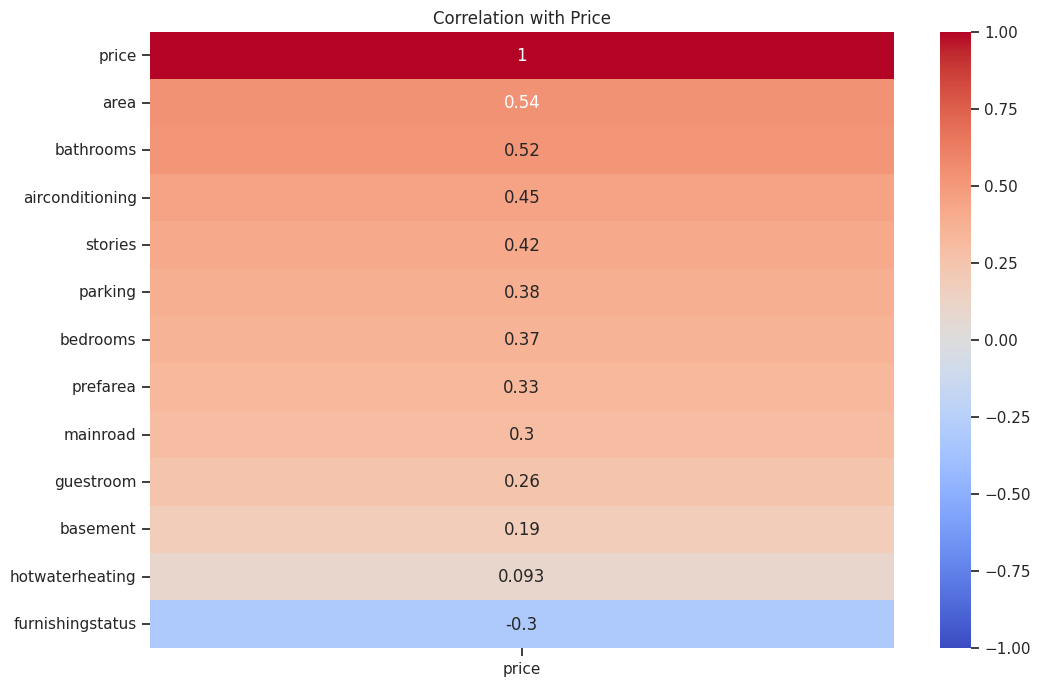

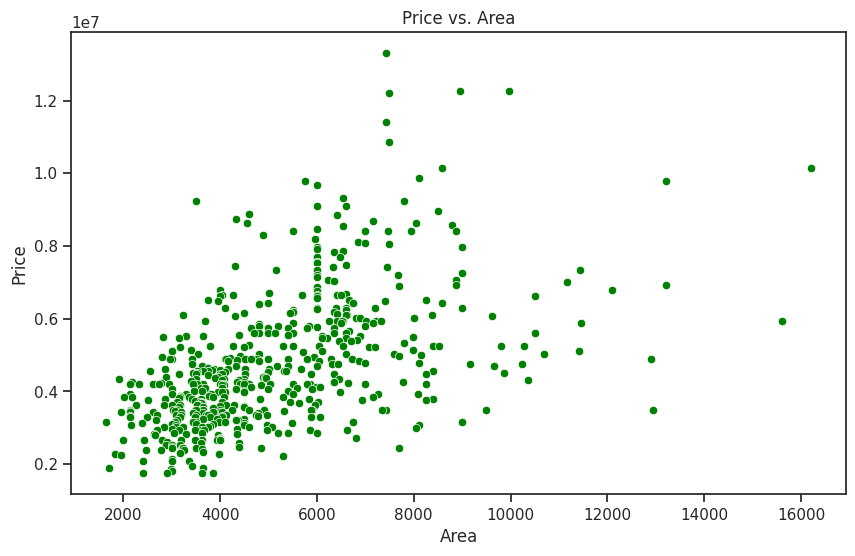

<ipython-input-30-f9d0fdaf1f44>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=data, palette='pastel')


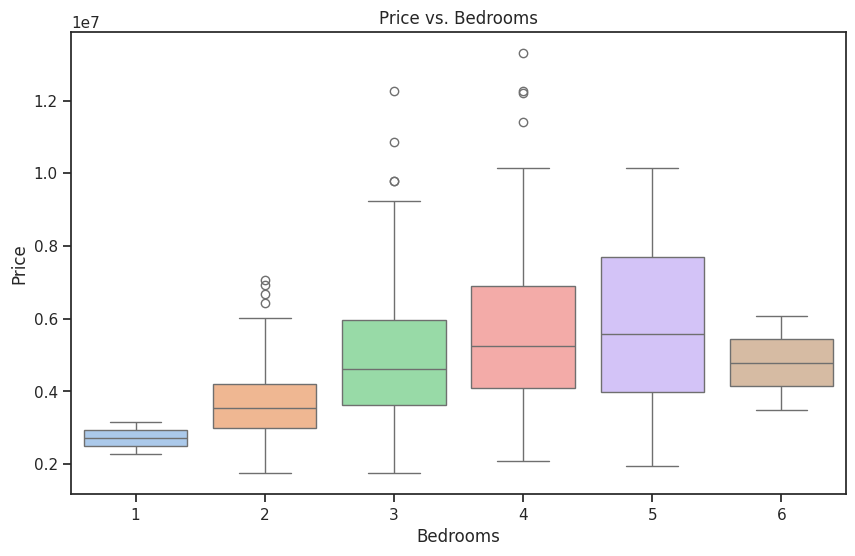

<ipython-input-30-f9d0fdaf1f44>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airconditioning', data=data, palette='Set2')


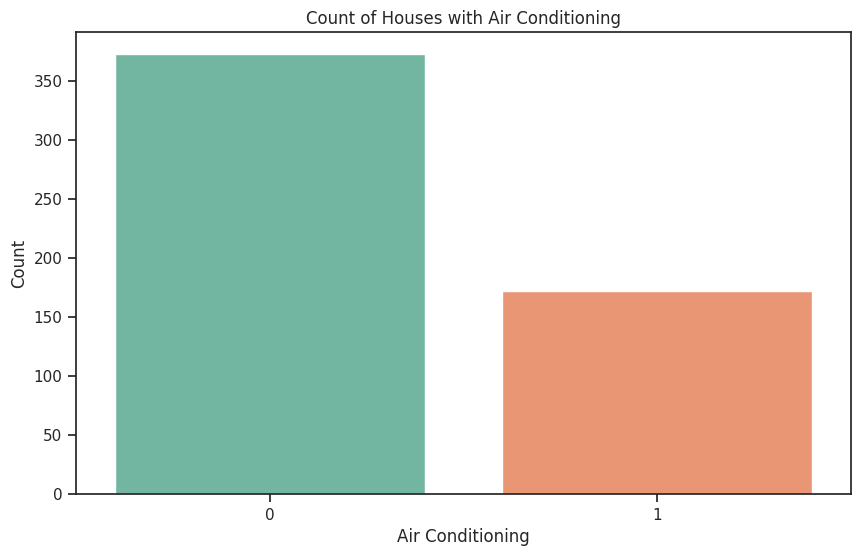

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="ticks")

# Visualize the distribution of the target variable 'price'
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, color='blue', bins=20)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation between features and the target variable 'price'
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Price')
plt.show()

# Visualize the relationship between 'area' and 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=data, color='green')
plt.title('Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

# Visualize the relationship between 'bedrooms' and 'price'
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=data, palette='pastel')
plt.title('Price vs. Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

# Visualize the count of 'airconditioning' and 'price'
plt.figure(figsize=(10, 6))
sns.countplot(x='airconditioning', data=data, palette='Set2')
plt.title('Count of Houses with Air Conditioning')
plt.xlabel('Air Conditioning')
plt.ylabel('Count')
plt.show()
